**Aman_Kumar_Mahato_Worksheet_2**<br>
**L5CG13**

# Problem 1 - Data Read, Write and Inspect:<br>
**Complete all following Task:<br>**
• Dataset for the Task: "bank.csv"<br>
Load the provided dataset and import in pandas DataFrame.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Concept and Technologies of AI/bank .csv')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


columns with dtypes=object

In [11]:
#(a) columns with dtypes=object.
df.dtypes

,0
age,int64
job,object
marital,object
education,object
default,object
balance,int64
housing,object
loan,object
contact,object
day,int64


unique values of those columns.

In [12]:
#(b) unique values of those
df.columns.unique()

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

check for the total number of null values in each column.

In [13]:
#(c) check for the total number of null values in each column.
df.isnull().sum().sum()

0

Drop all the columns with dtypes object and store in new DataFrame, also write the DataFrame in
”.csv” with name ”banknumericdata.csv”

In [5]:
new_df = df.drop(df.select_dtypes(include = "object").columns,axis = 1)
print(new_df)
new_df.to_csv("banknumericdata.csv")



       age  balance  day  duration  campaign  pdays  previous
0       58     2143    5       261         1     -1         0
1       44       29    5       151         1     -1         0
2       33        2    5        76         1     -1         0
3       47     1506    5        92         1     -1         0
4       33        1    5       198         1     -1         0
...    ...      ...  ...       ...       ...    ...       ...
45206   51      825   17       977         3     -1         0
45207   71     1729   17       456         2     -1         0
45208   72     5715   17      1127         5    184         3
45209   57      668   17       508         4     -1         0
45210   37     2971   17       361         2    188        11

[45211 rows x 7 columns]


Read ”banknumericdata.csv” and Find the summary statistics.

In [6]:
df_banknumericdata = pd.read_csv('banknumericdata.csv')
df_banknumericdata.describe()

,Unnamed: 0,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,22605.000000,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,13051.435847,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,0.000000,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,11302.500000,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,22605.000000,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,33907.500000,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,45210.000000,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


Problem 2 - Data Imputations:<br>
Complete all the following Task:<br>
• Dataset for the Task: "medical_student.csv"

Load the provided dataset and import in pandas DataFrame.

In [15]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Concept and Technologies of AI/medical_students_dataset.csv')
df.info()
df.head(200)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Student ID      180000 non-null  float64
 1   Age             180000 non-null  float64
 2   Gender          180000 non-null  object 
 3   Height          180000 non-null  float64
 4   Weight          180000 non-null  float64
 5   Blood Type      180000 non-null  object 
 6   BMI             180000 non-null  float64
 7   Temperature     180000 non-null  float64
 8   Heart Rate      180000 non-null  float64
 9   Blood Pressure  180000 non-null  float64
 10  Cholesterol     180000 non-null  float64
 11  Diabetes        180000 non-null  object 
 12  Smoking         180000 non-null  object 
dtypes: float64(9), object(4)
memory usage: 19.8+ MB


,Student ID,Age,Gender,Height,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking
0,1.0,18.0,Female,161.777924,72.354947,O,27.645835,NaN,95.0,109.0,203.0,No,NaN
1,2.0,NaN,Male,152.069157,47.630941,B,NaN,98.714977,93.0,104.0,163.0,No,No
2,3.0,32.0,Female,182.537664,55.741083,A,16.729017,98.260293,76.0,130.0,216.0,Yes,No
3,NaN,30.0,Male,182.112867,63.332207,B,19.096042,98.839605,99.0,112.0,141.0,No,Yes
4,5.0,23.0,Female,NaN,46.234173,O,NaN,98.480008,95.0,NaN,231.0,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,NaN,25.0,NaN,194.345159,47.386401,B,NaN,99.156792,67.0,91.0,238.0,No,No
196,197.0,NaN,Male,162.705659,59.356581,AB,22.421443,98.621361,78.0,91.0,189.0,No,No
197,198.0,25.0,Male,NaN,47.488177,NaN,NaN,98.966556,NaN,138.0,NaN,No,NaN
198,NaN,18.0,Male,159.571117,72.862406,O,28.615078,99.200828,63.0,NaN,151.0,NaN,No


Check info of the DataFrame and identify column with missing (null) values.

In [16]:
df.isnull().sum()

,0
Student ID,20000
Age,20000
Gender,20000
Height,20000
Weight,20000
Blood Type,20000
BMI,20000
Temperature,20000
Heart Rate,20000
Blood Pressure,20000


For the column with missing values fill the values using various techniques we discussed above. <br>
Try to explain why did you select the particular methods for particular column.

In [17]:
# can't fill the value inside the Student ID because every value should be unique.

#used mean to maintains the central tendency of the data.
df['Age']= df['Age'].fillna(df['Age'].mean())
#used mode to fills missing values with the most frequent category.
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])
#using median to handle outliers effectively.
df['Height']=df['Height'].fillna(df['Height'].median())
df['Weight']=df['Weight'].fillna(df['Weight'].median())
#using mode since it’s categorical data.
df['Blood Type']=df['Blood Type'].fillna(df['Blood Type'].mode()[0])
# using median to handle potential outliers
df['BMI'] = df['BMI'].fillna(df['BMI'].median())
df['Temperature'] = df['Temperature'].fillna(df['Temperature'].median())
df['Heart Rate'] = df['Heart Rate'].fillna(df['Heart Rate'].median())
df['Blood Pressure'] = df['Blood Pressure'].fillna(df['Blood Pressure'].median())
df['Cholesterol'] = df['Cholesterol'].fillna(df['Cholesterol'].median())
#using mode since it’s categorical data.
df['Diabetes'] = df['Diabetes'].fillna(df['Diabetes'].mode()[0])
df['Smoking'] = df['Smoking'].fillna(df['Smoking'].mode()[0])
df.isnull().sum()

,0
Student ID,20000
Age,0
Gender,0
Height,0
Weight,0
Blood Type,0
BMI,0
Temperature,0
Heart Rate,0
Blood Pressure,0


Check for any duplicate values present in Dataset and do necessary to manage the duplicate items.<br>
{Hint: dataset.duplicated.sum()}

In [18]:
df.duplicated().sum()

12724

# Exercises - Data Cleaning and Transformations with ”Titanic Dataset”:<br>
Dataset Used: "titanic.csv"<br>
Problem - 1:<br>
Create a DataFrame that is subsetted for the columns ’Name’, ’Pclass’, ’Sex’, ’Age’, ’Fare’, and ’Survived’.
Retain only those rows where ’Pclass’ is equal to 1, representing first-class passengers. What is the mean,
median, maximum value, and minimum value of the ’Fare’ column?

In [14]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Concept and Technologies of AI/Titanic-Dataset.csv')
df.info()
df.head(200)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,1,1,"Lurette, Miss. Elise",female,58.0,0,0,PC 17569,146.5208,B80,C
196,197,0,3,"Mernagh, Mr. Robert",male,NaN,0,0,368703,7.7500,NaN,Q
197,198,0,3,"Olsen, Mr. Karl Siegwart Andreas",male,42.0,0,1,4579,8.4042,NaN,S
198,199,1,3,"Madigan, Miss. Margaret ""Maggie""",female,NaN,0,0,370370,7.7500,NaN,Q


In [ ]:
df_subset = df[['Name','Pclass','Sex','Age','Fare','Survived']].loc[df['Pclass'] == 1]
print(df_subset['Fare'].describe())
df_subset

count    216.000000
mean      84.154687
std       78.380373
min        0.000000
25%       30.923950
50%       60.287500
75%       93.500000
max      512.329200
Name: Fare, dtype: float64


,Name,Pclass,Sex,Age,Fare,Survived
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,71.2833,1
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,53.1000,1
6,"McCarthy, Mr. Timothy J",1,male,54.0,51.8625,0
11,"Bonnell, Miss. Elizabeth",1,female,58.0,26.5500,1
23,"Sloper, Mr. William Thompson",1,male,28.0,35.5000,1
...,...,...,...,...,...,...
871,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",1,female,47.0,52.5542,1
872,"Carlsson, Mr. Frans Olof",1,male,33.0,5.0000,0
879,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",1,female,56.0,83.1583,1
887,"Graham, Miss. Margaret Edith",1,female,19.0,30.0000,1


Problem - 2:<br>
How many null values are contained in the ’Age’ column in your subsetted DataFrame? Once you’ve found
this out, drop them from your DataFrame.

In [ ]:
print(df_subset.isnull().sum())
df_subset = df_subset.dropna()
df_subset.isnull().sum()

Name         0
Pclass       0
Sex          0
Age         30
Fare         0
Survived     0
dtype: int64


,0
Name,0
Pclass,0
Sex,0
Age,0
Fare,0
Survived,0


# **Problem - 3:<br>**

The ’Embarked’ column in the Titanic dataset contains categorical data representing the ports of embarka-
tion:<br>

• ’C’ for Cherbourg<br>
• ’Q’ for Queenstown<br>
• ’S’ for Southampton<br>
Task:<br>
1. Use one-hot encoding to convert the ’Embarked’ column into separate binary columns (’Embarked C’,
’Embarked Q’, ’Embarked S’).
2. Add these new columns to the original DataFrame.
3. Drop the original ’Embarked’ column.
4. Print the first few rows of the modified DataFrame to verify the changes.

In [ ]:
embarka = pd.get_dummies(df['Embarked'],prefix="Embarked")
df = df.join(embarka)
df = df.drop('Embarked',axis=1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,False,False,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,False,False,True


Problem - 4:<br>

Compare the mean survival rates (’Survived’) for the different groups in the ’Sex’ column. Draw a visual-
ization to show how the survival distributions vary by gender.

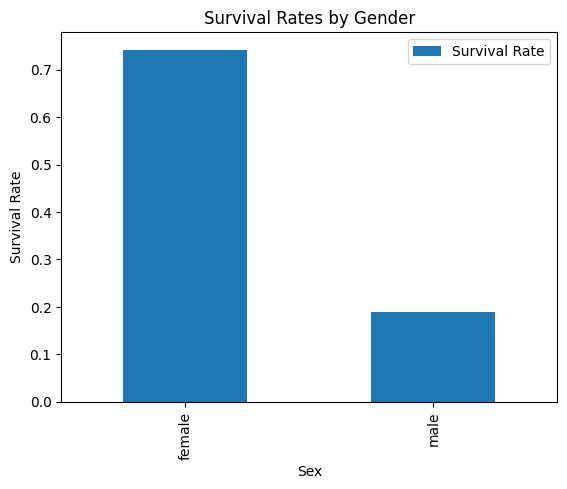

In [ ]:
import matplotlib.pyplot as plt
survival_by_gender = df.groupby('Sex')['Survived'].mean()
survival_by_gender.plot(kind='bar')
plt.xlabel('Sex')
plt.ylabel('Survival Rate')
plt.title('Survival Rates by Gender')
plt.legend(['Survival Rate'])
plt.show()

Problem - 5:<br>

Draw a visualization that breaks your visualization from Exercise 3 down by the port of embarkation (’Em-
barked’). In this instance, compare the ports ’C’ (Cherbourg), ’Q’ (Queenstown), and ’S’ (Southampton).

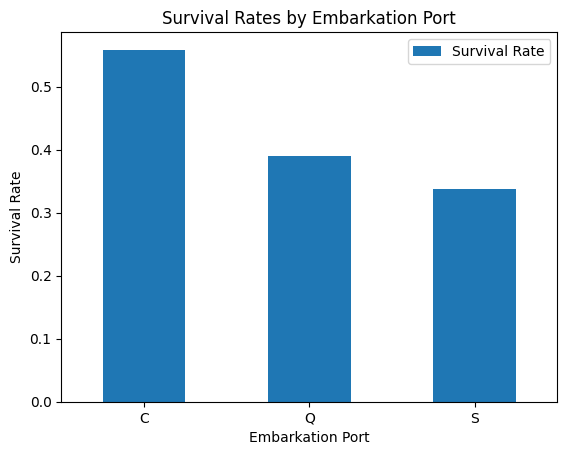

In [ ]:
df['Embarked'] = pd.Categorical(df[['Embarked_C', 'Embarked_Q', 'Embarked_S']].idxmax(axis=1))
df['Embarked'] = df['Embarked'].str.replace('Embarked_', '')
survival_by_embarked = df.groupby('Embarked',observed=True)['Survived'].mean()
survival_by_embarked.plot(kind='bar')
plt.xlabel('Embarkation Port')
plt.ylabel('Survival Rate')
plt.title('Survival Rates by Embarkation Port')
plt.legend(['Survival Rate'])
plt.xticks(rotation=0)
plt.show()

In [4]:
total_12=0
total_15=0
for i in range(1,1001):
  if i%12 == 0:
    total_12+=1
  if i%15 == 0:
    total_15+=1
print(f'The numbers divisible by 12 from 1 to 1000 is {total_12}')
print(f'The numbers divisible by 15 from 1 to 1000 is {total_15}')

The numbers divisible by 12 from 1 to 1000 is 83
The numbers divisible by 15 from 1 to 1000 is 66
